<a href="https://colab.research.google.com/github/EthanHugh/APS360/blob/main/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
from PIL import Image
import os

In [ ]:
img_path = "Desktop/APS360/project/bigset224"
classes = ['Arcade', 'Board Games', 'Educational', 'Fighting', 'Puzzle', 'Racing', 'RPG', 'Shooter', 'Sports', 'Strategy']

In [ ]:
img_path = "Desktop/APS360/project/bigset224"
classes = ['Arcade', 'Board Games', 'Educational', 'Fighting', 'Puzzle', 'Racing', 'RPG', 'Shooter', 'Sports', 'Strategy']
transform = transforms.ColorJitter(brightness=0.5,contrast=0.5,saturation=0.5,hue=0.1)
for i in classes:
    path = img_path + "/" + i
    imgs = [name for name in os.listdir(path)]
    for index, img_name in enumerate(imgs):
        img = Image.open(path + "/{}".format(img_name))
        img1 = transform(img)
        img1.save(path + "/{}.jpg".format(index))

# img = Image.open(img_path + "/Arcade/3 on 3 NHL Arcade.jpg")
# transform = transforms.ColorJitter(brightness=0.5,contrast=0.5,saturation=0.5,hue=0.2)
# img = transform(img)

In [ ]:
img_path = "Desktop/APS360/project/bigset224"
classes = ['Arcade', 'Board Games', 'Educational', 'Fighting', 'Puzzle', 'Racing', 'RPG', 'Shooter', 'Sports', 'Strategy']
transform = transforms.RandomRotation((180,180))
for i in classes:
    path = img_path + "/" + i
    imgs = [name for name in os.listdir(path)]
    for index, img_name in enumerate(imgs):
        img = Image.open(path + "/{}".format(img_name))
        img1 = transform(img)
        img1.save(path + "/{}.jpg".format(index + 1000))

In [ ]:
for i in classes:
    print(len([name for name in os.listdir(img_path + "/" + i)]))

In [ ]:
!pip install split-folders
import splitfolders

In [ ]:
splitfolders.ratio(img_path, img_path + "/datasets" , seed=42, ratio=(0.7, 0.15, 0.15))

In [ ]:
data_dir = "Desktop/APS360/project/bigset224/datasets/"
transform = transforms.ToTensor()

train_data = torchvision.datasets.ImageFolder(data_dir + 'train', transform=transform)
val_data = torchvision.datasets.ImageFolder(data_dir + 'val', transform=transform)
test_data = torchvision.datasets.ImageFolder(data_dir + 'test', transform=transform)

In [ ]:
print(len(train_data))

27994


In [ ]:
alex_train_path = "Desktop/APS360/project/alexnet_features/train"
alex_val_path = "Desktop/APS360/project/alexnet_features/val"
alex_test_path = "Desktop/APS360/project/alexnet_features/test"

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=1, num_workers=1)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=1, num_workers=1)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, num_workers=1)

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

c:\pythorz\python 39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\pythorz\python 39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for i, (img, label) in enumerate(train_loader):
  features = alexnet.features(img)
  tensor = torch.from_numpy(features.detach().numpy())
  torch.save(tensor.squeeze(0), "{0}/{1}/{2}.tensor".format(alex_train_path, classes[label], i))
  if i % 100 == 0:
      print(i)

print("done with training set")

for i, (img, label) in enumerate(val_loader):
  features = alexnet.features(img)
  tensor = torch.from_numpy(features.detach().numpy())
  torch.save(tensor.squeeze(0), "{0}/{1}/{2}.tensor".format(alex_val_path, classes[label], i))
  if i % 100 == 0:
      print(i)

print("done with validation set")

for i, (img, label) in enumerate(test_loader):
  features = alexnet.features(img)
  tensor = torch.from_numpy(features.detach().numpy())
  torch.save(tensor.squeeze(0), "{0}/{1}/{2}.tensor".format(alex_test_path, classes[label], i))
  if i % 100 == 0:
      print(i)

print("done with testing set")

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.name = "bigCNN"
    self.conv1 = nn.Conv2d(3, 96, 11, stride=4)
    #dims = 96*54*54 -> pool3 #dims is 96*26*26
    self.conv2 = nn.Conv2d(96, 256, 5, padding=2)
    #dims = 256*26*26 -> pool3 #dims is 256*12*12
    self.conv3 = nn.Conv2d(256, 384, 3, padding=1)
    #dims = 384*12*12
    self.conv4 = nn.Conv2d(384, 384, 3, padding=1)
    #dims = 384*12*12
    self.conv5 = nn.Conv2d(384, 256, 3, padding=1)
    #dims = 256*12*12 -> pool2 #dims is 256*6*6
    self.fc1 = nn.Linear(256 * 6 * 6, 4096)
    self.fc2 = nn.Linear(4096, 4096)
    self.fc3 = nn.Linear(4096, 10)
    
    self.pool2 = nn.MaxPool2d(2, 2)
    self.pool3 = nn.MaxPool2d(3, 2)

    self.dropout = nn.Dropout(0.5)

  def forward(self, x):
    x = self.pool3(F.relu(self.conv1(x)))
    x = self.pool3(F.relu(self.conv2(x)))
    x = F.relu(self.conv3(x))
    x = F.relu(self.conv4(x))
    x = self.pool2(F.relu(self.conv5(x)))
    x = x.view(-1, 256 * 6 * 6)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    x = self.dropout(x)
    return self.fc3(x)

In [ ]:
class ANNsmall(nn.Module):
    def __init__(self):
        super(ANNsmall, self).__init__()
        self.name = "ANNdropout"
        self.fc1 = nn.Linear(256 * 6 * 6, 64)
        self.fc2 = nn.Linear(64, 10)

        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6)        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        return self.fc2(x)

In [ ]:
print(torch.cuda.is_available())

True


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: ignored

In [ ]:
transform = transforms.ToTensor()

In [ ]:
# data_sets = '/content/gdrive/MyDrive/project/rawg224/datasets/'
# data_sets = "Desktop/APS360/project/bigset224/datasets/"

# loading data
# train_data = torchvision.datasets.ImageFolder(data_sets + 'train', transform=transform)
# val_data = torchvision.datasets.ImageFolder(data_sets + 'val', transform=transform)
# test_data = torchvision.datasets.ImageFolder(data_sets + 'test', transform=transform)


data_sets = "Desktop/APS360/project/alexnet_features/"

train_data = torchvision.datasets.DatasetFolder(data_sets + "train", loader=torch.load, extensions=(".tensor"))
val_data = torchvision.datasets.DatasetFolder(data_sets  + "val", loader=torch.load, extensions=(".tensor"))
test_data = torchvision.datasets.DatasetFolder(data_sets + "test", loader=torch.load, extensions=(".tensor"))

In [ ]:
num_total = len(train_data) + len(val_data) + len(test_data)

print(f'Training images: {len(train_data)} ({(len(train_data)/num_total)*100:.2f}%)')
print(f'Validation images: {len(val_data)} ({(len(val_data)/num_total)*100:.2f}%)')
print(f'Test images: {len(test_data)} ({(len(test_data)/num_total)*100:.2f}%)')

Training images: 27994 (70.00%)
Validation images: 5995 (14.99%)
Test images: 6005 (15.01%)


In [ ]:
def get_model_name(name, bs, lr, epoch):
  path = "{0}_bs{1}_lr{2}_epoch{3}".format(name, bs, lr, epoch)
  return path

In [ ]:
use_cuda = True

def get_accuracy(model, bs=64, train=False):
  data = train_data if train else val_data
  correct = 0
  total = 0
  
  for imgs, labels in torch.utils.data.DataLoader(data, batch_size=bs):
    #GPU time
    if use_cuda and torch.cuda.is_available():
      imgs = imgs.cuda()
      labels = labels.cuda()
    
    output = model(imgs)
    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += imgs.shape[0]
  
  return correct / total

In [ ]:
def train(model, data, bs=64, e=20, lr=0.001):
    train_loader = torch.utils.data.DataLoader(data, batch_size=bs, shuffle=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    print("Starting Training...")
    for epoch in range(e):
        for imgs, labels in iter(train_loader):
            #GPU stuff
            if use_cuda and torch.cuda.is_available():
                imgs = imgs.cuda()
                labels = labels.cuda()

            out = model(imgs)             # forward pass

            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

        # save the current training information
        iters.append(n)
        losses.append(float(loss)/bs)             # compute *average* loss
        train_acc.append(get_accuracy(model, train=True, bs=bs)) # compute training accuracy
        val_acc.append(get_accuracy(model, train=False, bs=bs))  # compute validation accuracy

        print("epoch: {0}, train accuracy: {1:.5f}, loss: {2:.5f}, val accuracy: {3:.5f}".format(epoch + 1, train_acc[epoch], losses[epoch], val_acc[epoch]))

        torch.save(model.state_dict(), "Desktop/APS360/project/alexnet_features/model/{0}".format(get_model_name(model.name, bs, lr, epoch)))
        n += 1

    # plotting
    plt.title("Loss Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [ ]:
# base model
model1 = ANNsmall()

if use_cuda and torch.cuda.is_available():
    model1.cuda()
    print("GPU time")
else:
    print("no GPU :(")

train(model1, e=150, data=train_data, bs=64, lr=0.005)

GPU time
Starting Training...


KeyboardInterrupt: ignored

In [ ]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.name = "ANNsmall"
        self.fc1 = nn.Linear(256 * 6 * 6, 32)
        self.fc2 = nn.Linear(32, 10)

        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6)        
        x = F.relu(self.fc1(x))
        return self.fc2(x)

GPU time
Starting Training...
epoch: 1, train accuracy: 0.32121, loss: 0.03245, val accuracy: 0.30492
epoch: 2, train accuracy: 0.36844, loss: 0.02790, val accuracy: 0.32344
epoch: 3, train accuracy: 0.42791, loss: 0.03149, val accuracy: 0.35196
epoch: 4, train accuracy: 0.42823, loss: 0.02467, val accuracy: 0.33344
epoch: 5, train accuracy: 0.45138, loss: 0.03000, val accuracy: 0.33945
epoch: 6, train accuracy: 0.47557, loss: 0.02280, val accuracy: 0.35229
epoch: 7, train accuracy: 0.54129, loss: 0.02198, val accuracy: 0.37548
epoch: 8, train accuracy: 0.52922, loss: 0.01880, val accuracy: 0.37214
epoch: 9, train accuracy: 0.60284, loss: 0.02401, val accuracy: 0.39550
epoch: 10, train accuracy: 0.55758, loss: 0.02548, val accuracy: 0.38582
epoch: 11, train accuracy: 0.60159, loss: 0.01533, val accuracy: 0.39049
epoch: 12, train accuracy: 0.63531, loss: 0.01799, val accuracy: 0.40801
epoch: 13, train accuracy: 0.62060, loss: 0.01183, val accuracy: 0.40100
epoch: 14, train accuracy: 0.6

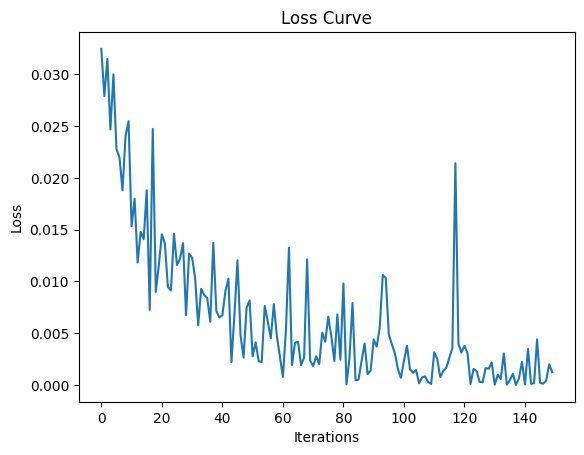

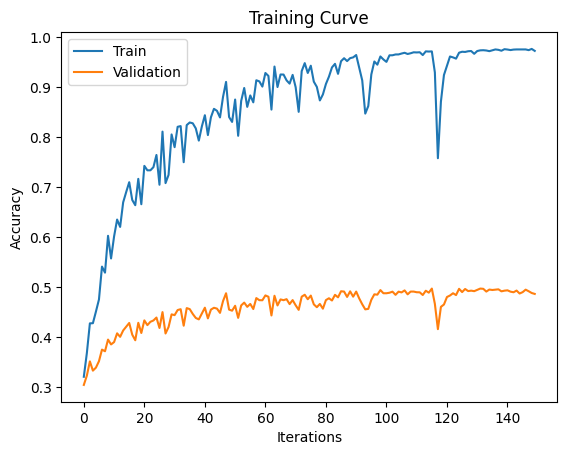

Final Training Accuracy: 0.9722797742373366
Final Validation Accuracy: 0.48673894912427024


In [ ]:
model2 = ANN()

if use_cuda and torch.cuda.is_available():
    model2.cuda()
    print("GPU time")
else:
    print("no GPU :(")

train(model2, e=150, data=train_data, bs=64, lr=0.005)

In [ ]:
class ANNtiny(nn.Module):
    def __init__(self):
        super(ANNtiny, self).__init__()
        self.name = "ANNtiny"
        self.fc1 = nn.Linear(256 * 6 * 6, 16)
        self.fc2 = nn.Linear(16, 10)

        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6)        
        x = F.relu(self.fc1(x))
        return self.fc2(x)

In [ ]:
model3 = ANNtiny()

if use_cuda and torch.cuda.is_available():
    model3.cuda()
    print("GPU time")
else:
    print("no GPU :(")

train(model3, e=150, data=train_data, bs=64, lr=0.005)


In [ ]:
print(torch.cuda.memory_summary(device=None, abbreviated=True))

In [ ]:
class CNNsmall(nn.Module):
  def __init__(self):
    super(CNNsmall, self).__init__()
    self.name = "CNN"
    self.conv1 = nn.Conv2d(3, 96, 11, stride=4)
    #dims = 96*54*54 -> pool3 #dims is 96*26*26
    self.conv2 = nn.Conv2d(96, 256, 5, padding=2)
    #dims = 256*26*26 -> pool3 #dims is 256*12*12
    self.conv3 = nn.Conv2d(256, 384, 3, padding=1)
    #dims = 384*12*12
    self.conv4 = nn.Conv2d(384, 384, 3, padding=1)
    #dims = 384*12*12
    self.conv5 = nn.Conv2d(384, 256, 3, padding=1)
    #dims = 256*12*12 -> pool2 #dims is 256*6*6
    self.fc1 = nn.Linear(256 * 6 * 6, 4096)
    self.fc2 = nn.Linear(4096, 10)
    
    self.pool2 = nn.MaxPool2d(2, 2)
    self.pool3 = nn.MaxPool2d(3, 2)

    self.dropout = nn.Dropout(0.5)

  def forward(self, x):
    x = self.pool3(F.relu(self.conv1(x)))
    x = self.pool3(F.relu(self.conv2(x)))
    x = F.relu(self.conv3(x))
    x = F.relu(self.conv4(x))
    x = self.pool2(F.relu(self.conv5(x)))
    x = x.view(-1, 256 * 6 * 6)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    return self.fc2(x)

In [ ]:
model4 = CNNsmall()

if use_cuda and torch.cuda.is_available():
    model4.cuda()
    print("GPU time")
else:
    print("no GPU :(")

train(model4, e=100, data=train_data, bs=16, lr=0.005)

In [ ]:
def get_test_accuracy(model, bs=64):
  data = test_data
  correct = 0
  total = 0
  
  for imgs, labels in torch.utils.data.DataLoader(data, batch_size=bs):
    #GPU time
    if use_cuda and torch.cuda.is_available():
      imgs = imgs.cuda()
      labels = labels.cuda()
    
    output = model(imgs)
    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += imgs.shape[0]
  
  return correct / total

In [ ]:
best = ANN().cuda()
best_path = "Desktop/APS360/project/alexnet_features/model/ANNsmall_bs64_lr0.005_epoch124"
state = torch.load(best_path)
best.load_state_dict(state)

<All keys matched successfully>

In [ ]:
print("Test accuracy: {0}".format(get_test_accuracy(best)))

Test accuracy: 0.4925895087427144
